In [2]:
#pip install neattext

  Obtaining dependency information for neattext from https://files.pythonhosted.org/packages/ca/69/320062a5980ec9b6383bb9caf2a335e0f177164a2e7dd1d98f967b07e1c7/neattext-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/114.7 kB ? eta -:--:--
   --- ------------------------------------ 10.2/114.7 kB ? eta -:--:--
   ------------- ------------------------- 41.0/114.7 kB 653.6 kB/s eta 0:00:01
   ------------------------------- ------- 92.2/114.7 kB 744.7 kB/s eta 0:00:01
   -------------------------------------- 114.7/114.7 kB 741.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
# Load EDA Packages
import pandas as pd
import numpy as np
# Load Data Vizualization Packages
import seaborn as sns
# Load Text Cleaning Package
import neattext.functions as nfx
# Load ML Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
# Load Dataset
df = pd.read_csv("dataset.csv")

In [39]:
df.head()

,Unnamed: 0,content,sentiment
0,0,alonzo feels angry,anger
1,1,alonzo feels furious,anger
2,2,alonzo feels irritated,anger
3,3,alonzo feels enraged,anger
4,4,alonzo feels annoyed,anger


In [40]:
# Value Counts
df['sentiment'].value_counts()

sentiment
anger      2100
sadness    2100
fear       2100
joy        2100
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

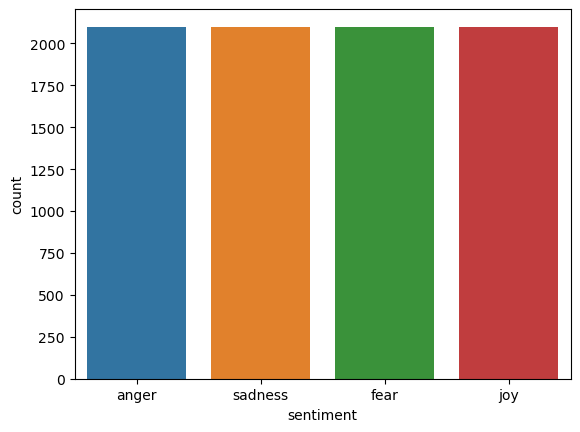

In [41]:
# Plot
sns.countplot(x='sentiment',data=df)

In [42]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [43]:
# User handles
df['Clean_Text'] = df['content'].apply(nfx.remove_userhandles)

In [44]:
# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [45]:
df.head()

,content,sentiment,Clean_Text
0,alonzo feels angry,anger,alonzo feels angry
1,alonzo feels furious,anger,alonzo feels furious
2,alonzo feels irritated,anger,alonzo feels irritated
3,alonzo feels enraged,anger,alonzo feels enraged
4,alonzo feels annoyed,anger,alonzo feels annoyed


In [46]:
df.dropna(inplace=True)

In [47]:
df.isnull().sum()

content       0
sentiment     0
Clean_Text    0
dtype: int64

In [48]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

In [49]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [50]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [51]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [52]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [54]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

1.0

In [55]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [56]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [57]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.00744556, 0.00714387, 0.9780974 , 0.00731316]])

In [58]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

In [59]:
# Save Model & Pipeline
import joblib
pipeline_file = open("model.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()